In [57]:
from HelpFunctions.date_and_time import most_recent_thursday, split_time
from DAX.HelpFunctions.get_dax_data import get_dax_data
from datetime import timedelta
from HelpFunctions.calc_score import evaluate_horizon
from HelpFunctions.mix_models import mix_models
import pandas as pd
from DAX.Models.baseline import baseline
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import importlib
# importlib.reload(Energy.Models)

In [58]:
df = get_dax_data()
df = df.drop(columns=['Close']).dropna()

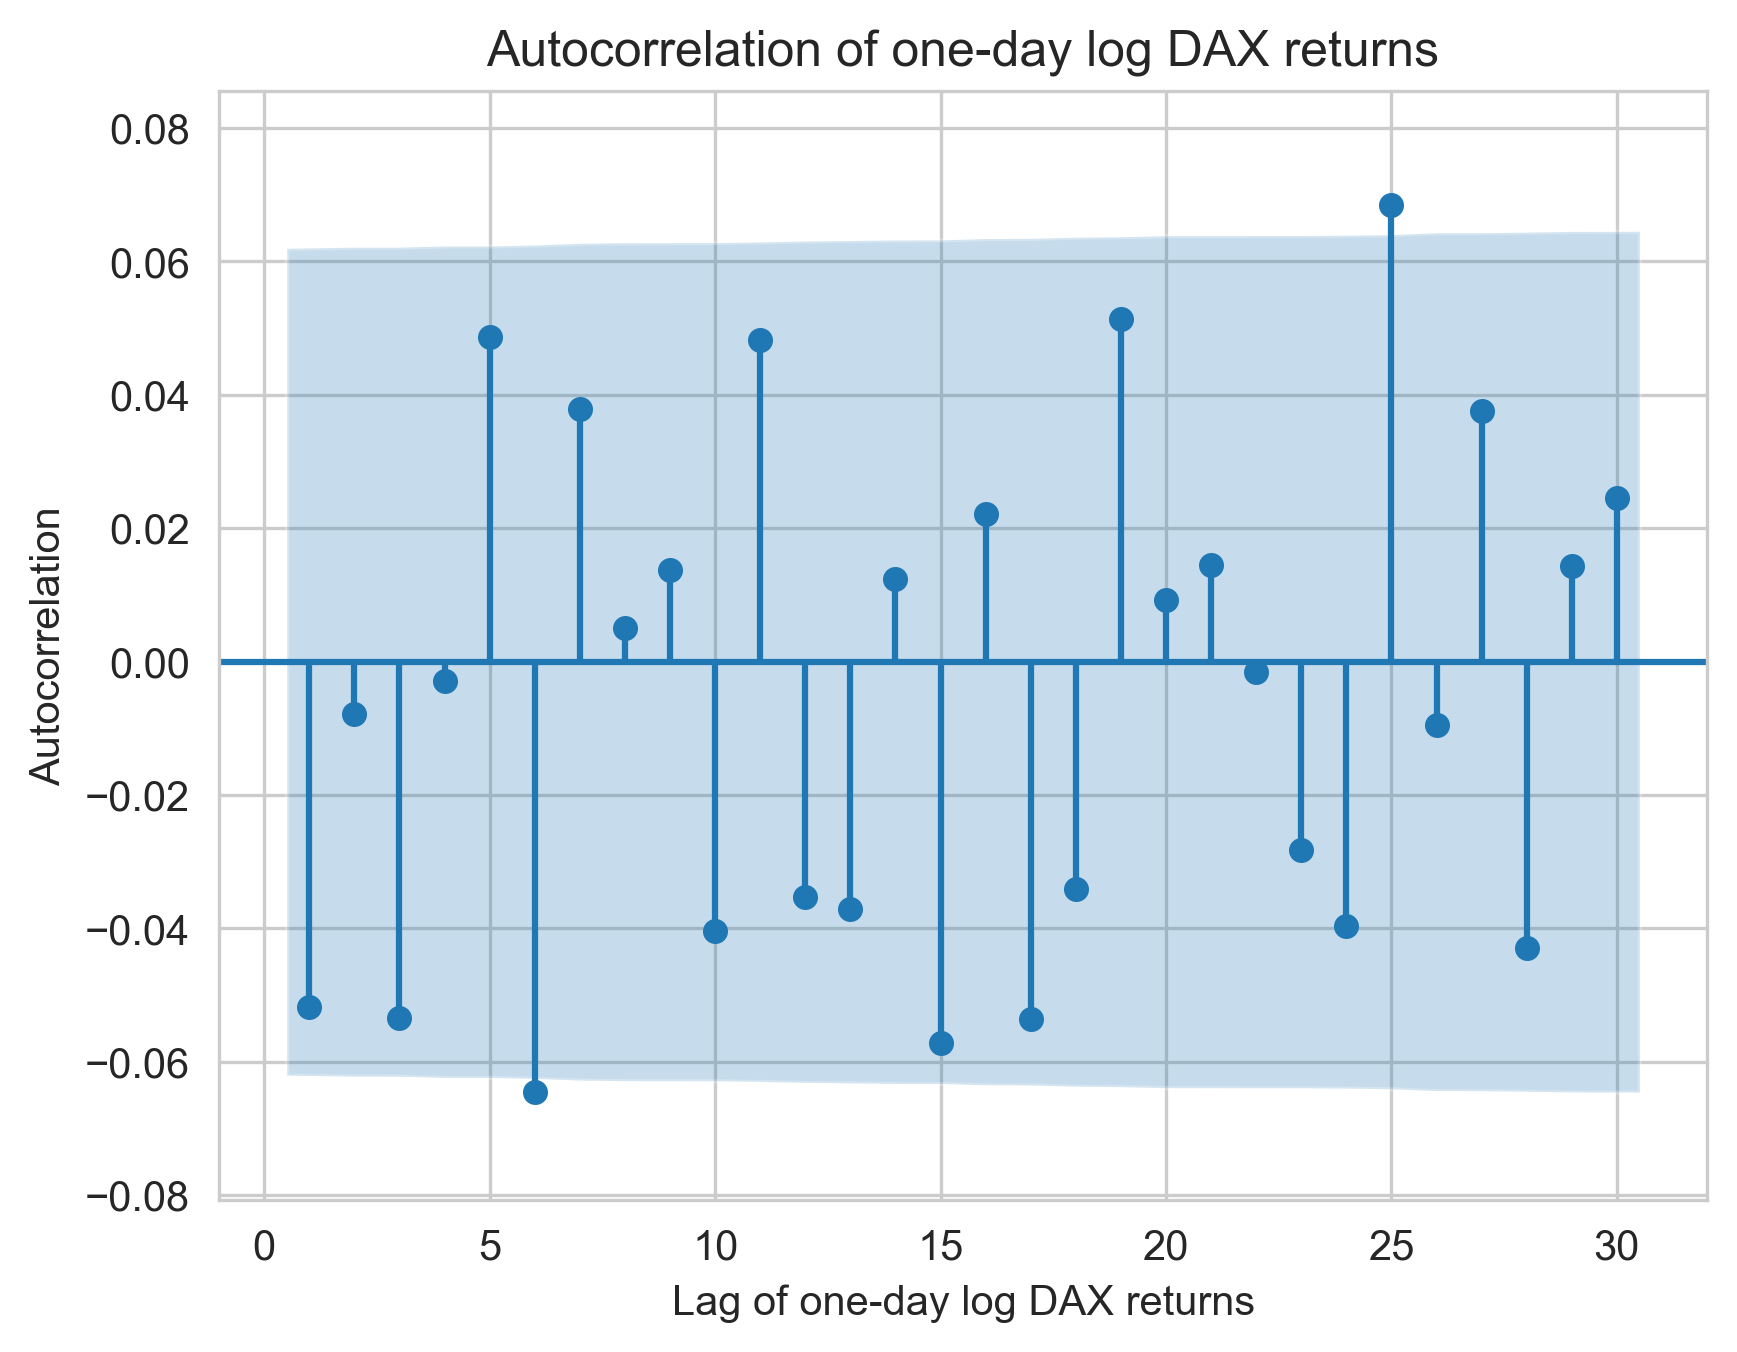

In [68]:
fig, ax = plt.subplots(dpi=300)  # Create a figure with the desired dpi
title = 'Autocorrelation of one-day log DAX returns'
plot_acf(df['ret1'].tail(1000),ax=ax, zero=False, auto_ylims=True, title=title)
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag of one-day log DAX returns')
plt.savefig(f'./Plots/DAX_acf.png')
plt.show()

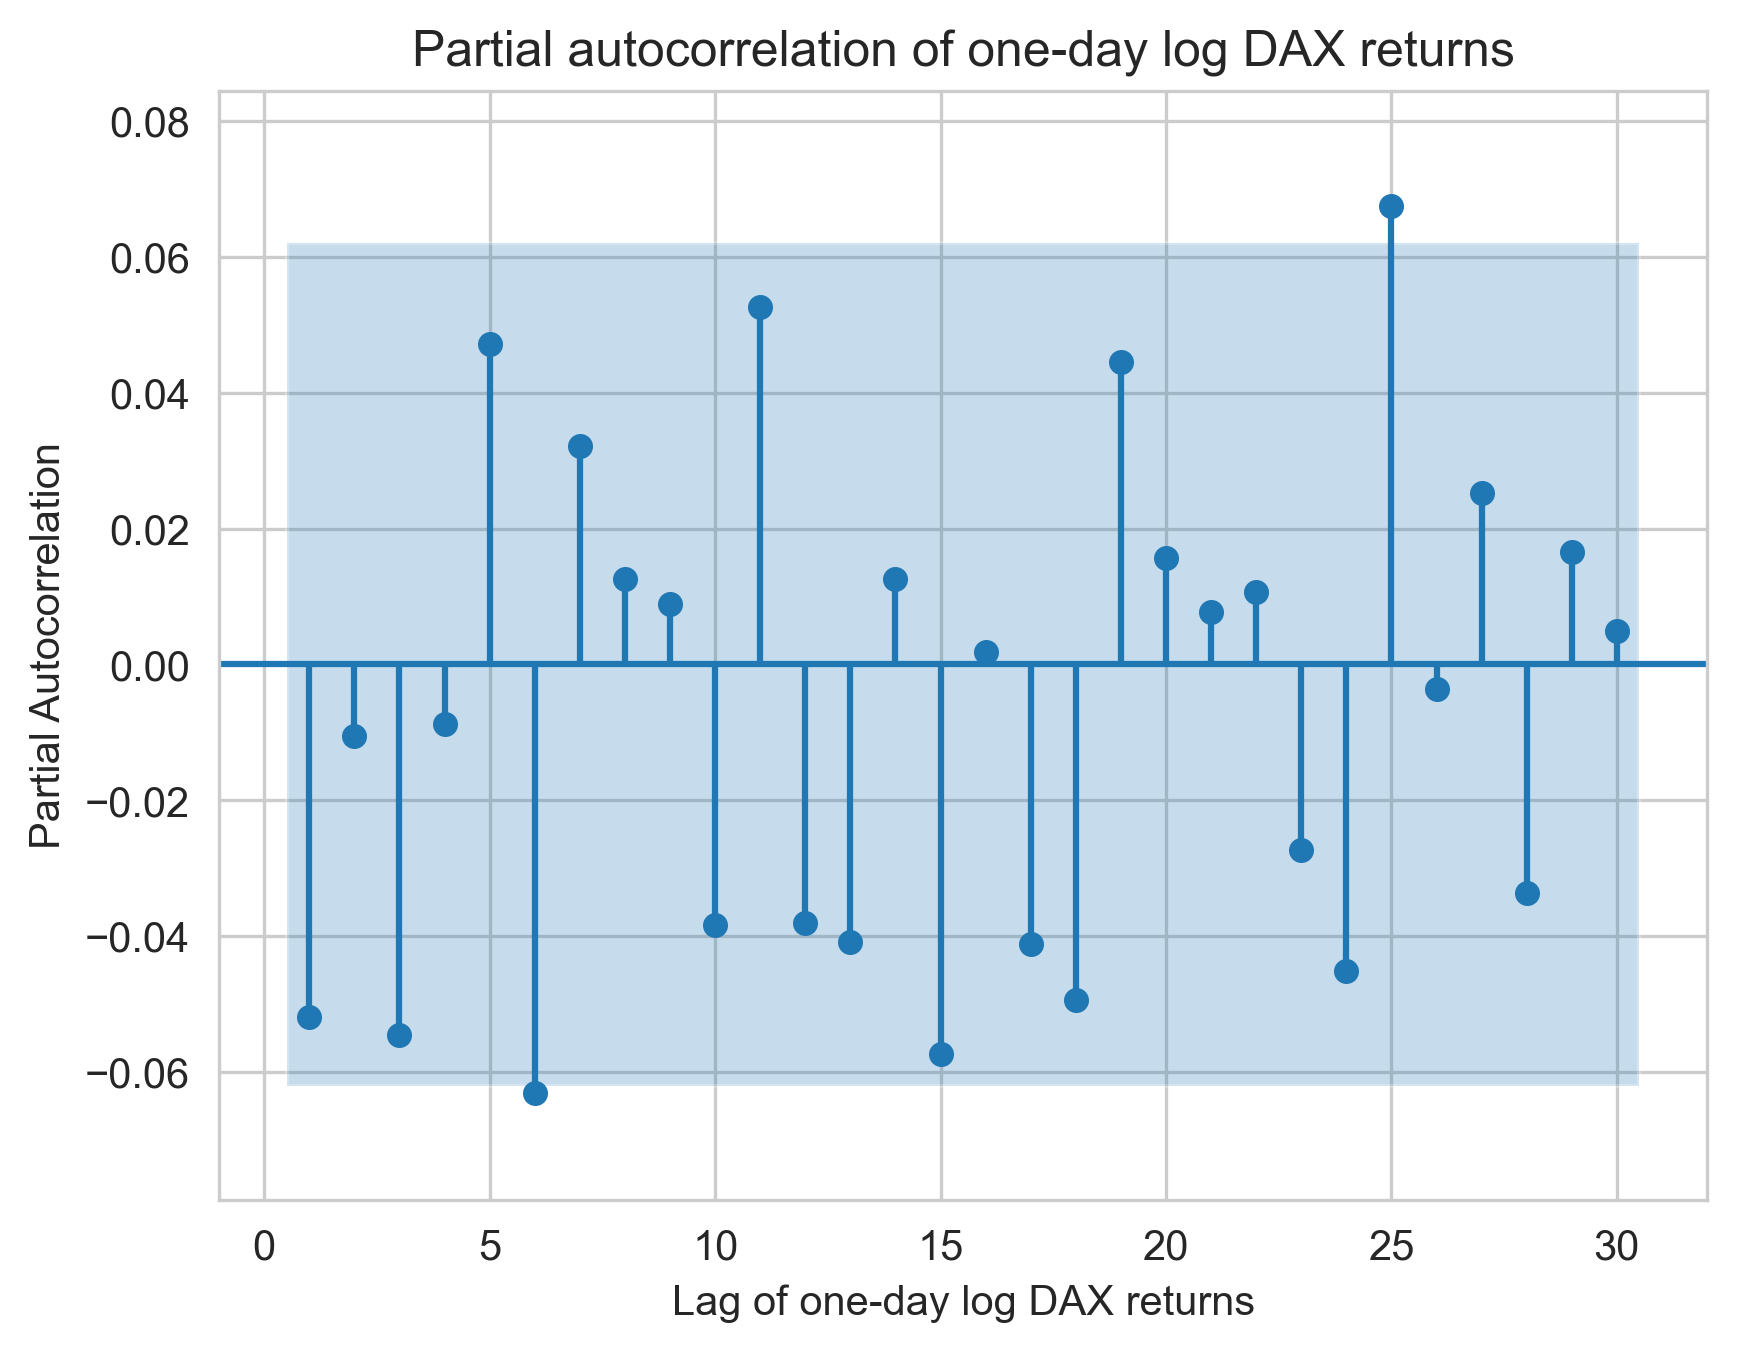

In [69]:
fig, ax = plt.subplots(dpi=300)  # Create a figure with the desired dpi
title = 'Partial autocorrelation of one-day log DAX returns'
plot_pacf(df['ret1'].tail(1000),ax=ax, zero=False, auto_ylims=True, title=title)
ax.set_ylabel('Partial Autocorrelation')
ax.set_xlabel('Lag of one-day log DAX returns')
plt.savefig(f'./Plots/DAX_pacf.png')
plt.show()

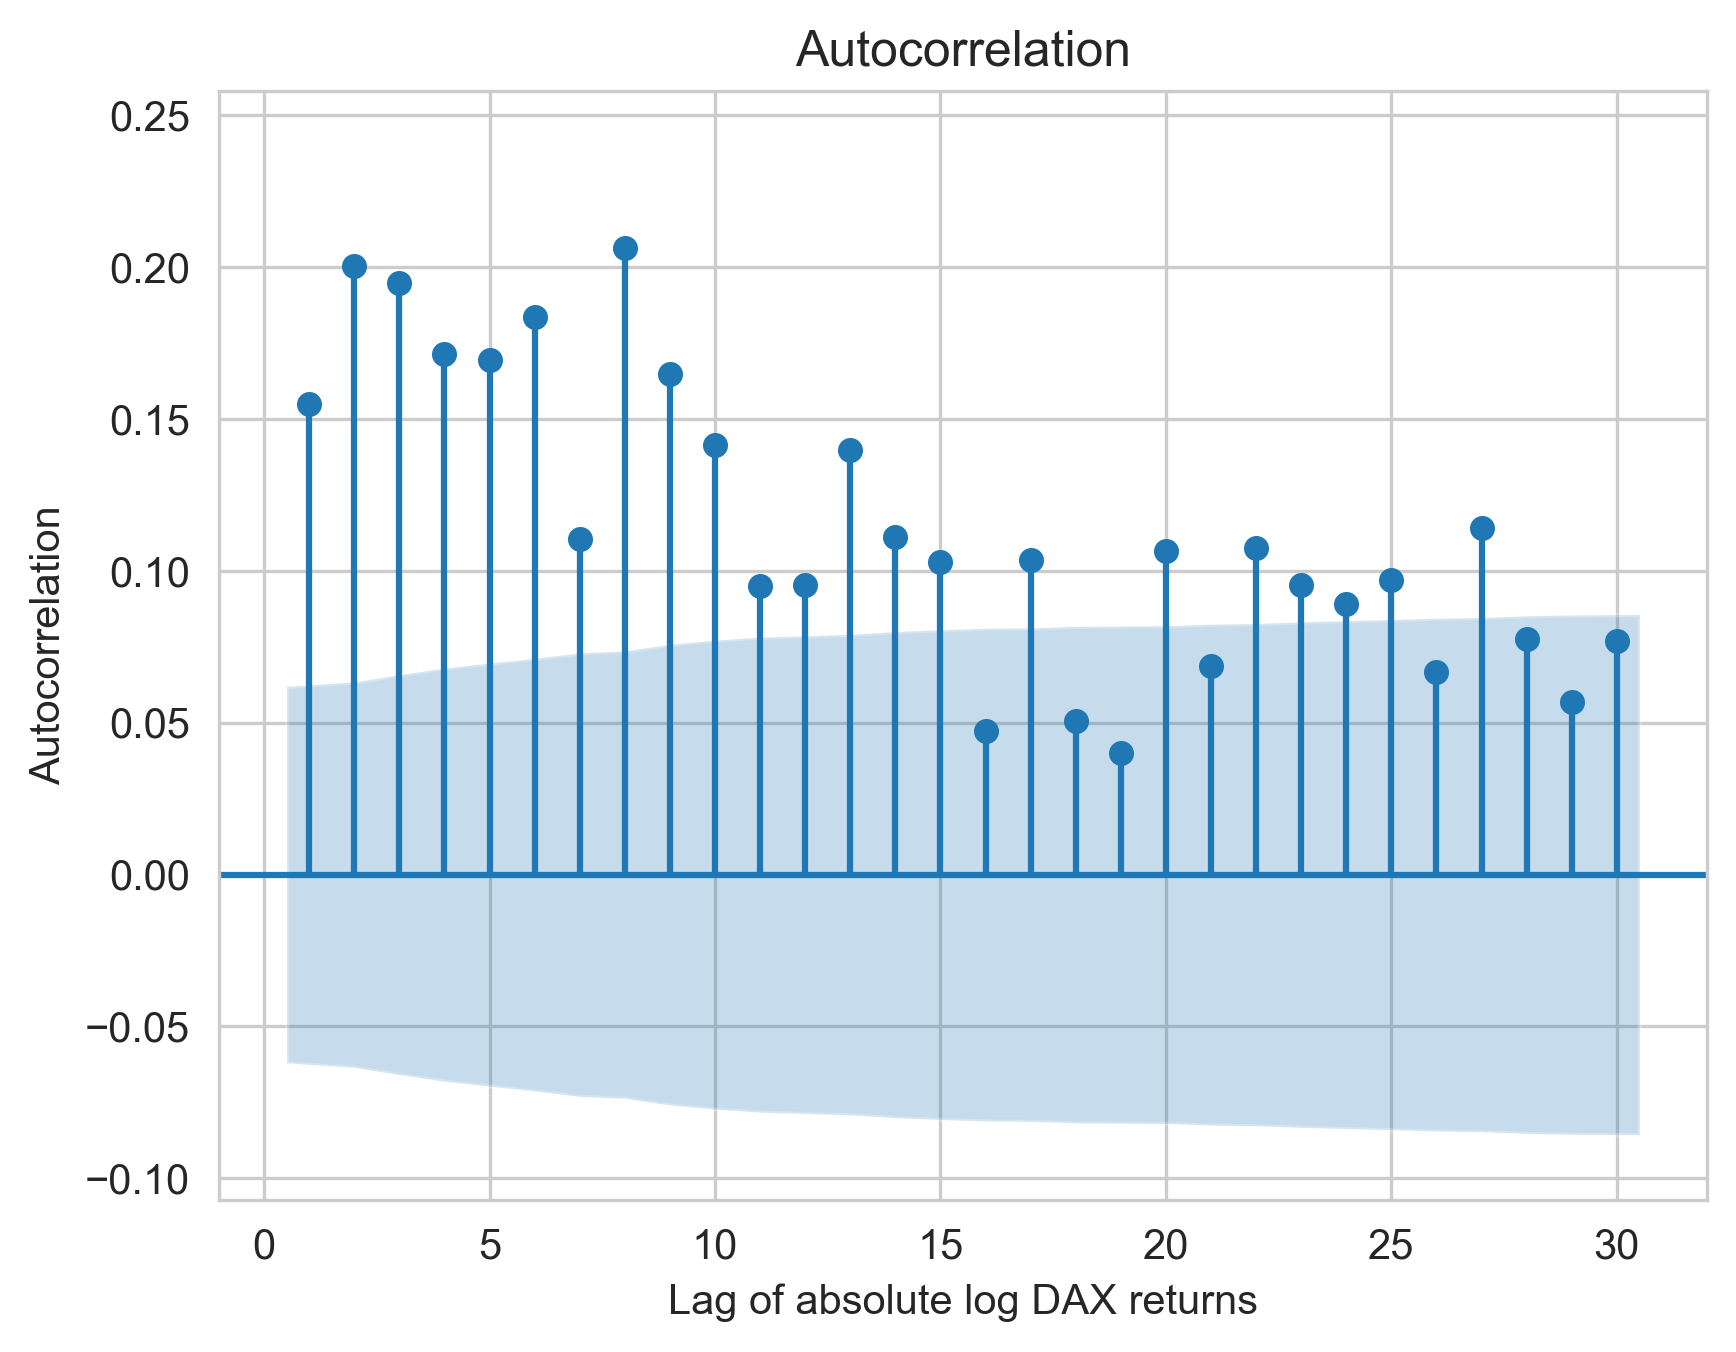

In [70]:
fig, ax = plt.subplots(dpi=300)  # Create a figure with the desired dpi
plot_acf(abs(df['ret1'].tail(1000)), ax=ax, zero=False, auto_ylims=True)
title = 'Autocorrelation of absolute log DAX returns'
plt.ylabel('Autocorrelation')
plt.xlabel('Lag of absolute log DAX returns')
plt.savefig(f'./Plots/DAX_acf_abs.png')
plt.show()

In [62]:
df['ret1'].tail(20)

Date
2024-02-12 00:00:00+01:00    0.652753
2024-02-13 00:00:00+01:00   -0.922931
2024-02-14 00:00:00+01:00    0.382250
2024-02-15 00:00:00+01:00    0.595486
2024-02-16 00:00:00+01:00    0.414178
2024-02-19 00:00:00+01:00   -0.147208
2024-02-20 00:00:00+01:00   -0.139518
2024-02-21 00:00:00+01:00    0.290696
2024-02-22 00:00:00+01:00    1.463294
2024-02-23 00:00:00+01:00    0.281007
2024-02-26 00:00:00+01:00    0.022389
2024-02-27 00:00:00+01:00    0.761930
2024-02-28 00:00:00+01:00    0.254456
2024-02-29 00:00:00+01:00    0.436339
2024-03-01 00:00:00+01:00    0.321241
2024-03-04 00:00:00+01:00   -0.106628
2024-03-05 00:00:00+01:00   -0.100352
2024-03-06 00:00:00+01:00    0.103405
2024-03-07 00:00:00+01:00    0.709453
2024-03-08 00:00:00+01:00   -0.154516
Name: ret1, dtype: float64